### Part 2 1 code

In [33]:
#functions and code to read text for part 2
from textblob import TextBlob, Word
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from operator import itemgetter
import re
import matplotlib.pyplot as plt
import pandas as pd 
import imageio

def removeCharactersAndStopWords(wordList):
    return [re.sub('[!@#$.,0123456789?\':()/;`“”"-]', '', word) for word in wordList if word not in stopwords.words('english')]

def getTextBlobFromText(filename):
    words = []
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            for word in line.split():
               words.append(word.lower()) 
    return ProcessText(words)

def ProcessText(text):
    finalWordList = []
    tempWordList = []
    tempWordList = removeCharactersAndStopWords(text)
    for word in tempWordList:
        w = Word(word)
        finalWordList.append(w.lemmatize())

    #idk why I need to run again, but it was adding back 
    #stuff after lemmization and I was tired of trying to fix
    #There's a better way for sure
    finalWordList = removeCharactersAndStopWords(finalWordList)

    newBlob = TextBlob(' '.join(finalWordList))
    return newBlob

ozy = getTextBlobFromText("texts/ozymandius.txt")
aod = getTextBlobFromText("texts/armyOfDarkness.txt")
pag = getTextBlobFromText("texts/princessAndGoblin.txt")

Below are the output funtions and code for part 2 b & c

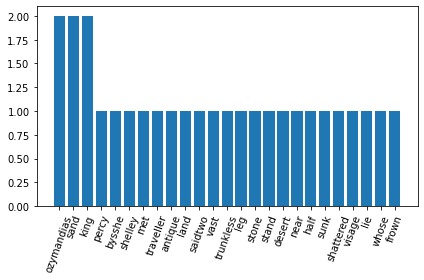

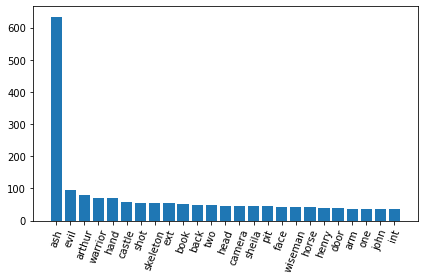

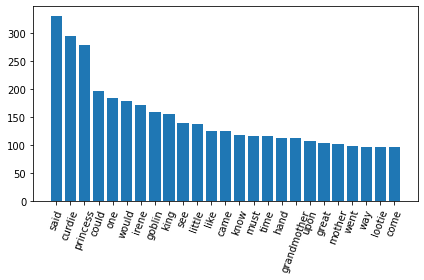

['ozymandias', 'sand', 'king', 'percy', 'bysshe', 'shelley', 'met', 'traveller', 'antique', 'land', 'saidtwo', 'vast', 'trunkless', 'leg', 'stone', 'stand', 'desert', 'near', 'half', 'sunk', 'shattered', 'visage', 'lie', 'whose', 'frown', 'wrinkled', 'lip', 'sneer', 'cold', 'command', 'tell', 'sculptor', 'well', 'passion', 'read', 'yet', 'survive', 'stamped', 'lifeless', 'thing', 'hand', 'mocked', 'heart', 'fed', 'pedestal', 'word', 'appear', 'name', 'look', 'work', 'ye', 'mighty', 'despair', 'nothing', 'beside', 'remains', 'round', 'decay', 'colossal', 'wreck', 'boundless', 'bare', 'lone', 'level', 'stretch', 'far', 'away']
['ash', 'evil', 'arthur', 'warrior', 'hand', 'castle', 'shot', 'skeleton', 'ext', 'book', 'back', 'two', 'head', 'camera', 'sheila', 'pit', 'face', 'wiseman', 'horse', 'henry', 'door', 'arm', 'one', 'john', 'int', 'look', 'iron', 'night', 'close', 'wall', 'ride', 'tiny', 'come', 'dead', 'chainsaw', 'turn', 'eye', 'like', 'sword', 'mill', 'upon', 'woman', 'deadite',

In [42]:
#output code for part 2
def PlotTop25Words(textBlob, fileName):
    wordList = []
    countList = []
    d = Counter(textBlob.word_counts)
    for w, c in d.most_common(25):
        wordList.append(w)
        countList.append(c)

    plt.bar(x=wordList, height=countList)
    plt.xticks(rotation=70)
    plt.tight_layout()
    plt.savefig(fname=fileName, facecolor='white')
    plt.show()

def GenerateCloud(maskFile, outputFile, blob, numberOfWords, colormap):
    items = blob.word_counts.items()
    sortedItems = sorted(items, key=itemgetter(1), reverse=True)
    topWords = []
    for word in sortedItems[:numberOfWords]:
        topWords.append(word[0]) 

    mask_image = imageio.imread(maskFile)

    wordCloud = WordCloud(width=1000, height=1000, colormap=colormap, mask=mask_image, background_color='white')
    wordCloud.generate(' '.join(topWords))
    wordCloud = wordCloud.to_file(outputFile)

PlotTop25Words(ozy, 'output/ozyBar.png')
PlotTop25Words(aod, 'output/aodBar.png')
PlotTop25Words(pag, 'output/pagBar.png')

GenerateCloud('masks/crab.png','output/ozyCloud.png', ozy, 100, "gist_earth")
GenerateCloud('masks/chainsaw.png','output/aodCloud.png', aod, 100, "twilight_shifted")
GenerateCloud('masks/crown.png','output/pagCloud.png', pag, 100, "spring")